In [3]:
import numpy as np
import matplotlib.pyplot as plt

machine_eps = np.finfo(float).eps
h = 1.0

# Function f(u) to compute the residuals for a given u
def f(u):
    N = len(u)
    
    # Initialize an array to store the residuals
    callback = np.zeros(N)
    
    # Boundary conditions: first and last elements of the callback array
    callback[0] = u[0]
    callback[-1] = u[-1]

    # Compute residuals for the interior points using finite differences
    for i in range(1, N-1):
        # Finite difference scheme to calculate the residual
        callback[i] = (1/h**2) * (-u[i+1] + 2 * u[i] - u[i-1]) + (u[i]**3) - 1

    return callback


# Function df(u) to compute the Jacobian matrix
def df(u):
    N = len(u)
    
    # Initialize an empty matrix to store the Jacobian
    callback = np.zeros((N, N))
    
    # Boundary conditions: first and last rows of the Jacobian matrix
    callback[0, 0] = 1
    callback[-1, -1] = 1

    # Compute the Jacobian for the interior points
    for i in range(1, N-1):
        # Fill the Jacobian matrix using finite difference scheme
        callback[i, i+1] = -1 / h**2
        callback[i, i] = 2 / h**2 + 3 * u[i]**2
        callback[i, i-1] = -1 / h**2
    
    return callback


# Newton's method for solving nonlinear equations
def newtons_method(f, df, xprev, max_iter=100, min_tolerance=machine_eps):
    errors = []  # List to store errors at each iteration
    for _ in range(max_iter):
        f_val = f(xprev)  # Compute the residuals using f(u)
        df_val = df(xprev)  # Compute the Jacobian matrix using df(u)
        xnew = xprev - np.linalg.solve(df_val, f_val)  # Update x using Newton's method
        
        # Compute and store the error (L2 norm) between xnew and xprev
        errors.append(np.linalg.norm(xnew - xprev, 2))
        
        xprev = xnew  # Update xprev for the next iteration
        if errors[-1] < min_tolerance:  # Check convergence based on tolerance
            break  # If converged, exit the loop

    return xprev, errors, min_tolerance  # Return the solution, errors, and the final tolerance



Zero found at u = [0.         0.75693655 0.94756213 0.98897911 0.99769646 0.99951908
 0.99989962 0.99997905 0.99999563 0.99999909 0.99999981 0.99999996
 0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999999 0.99999996 0.99999981
 0.99999909 0.99999563 0.99997905 0.99989962 0.99951908 0.99769646
 0.988

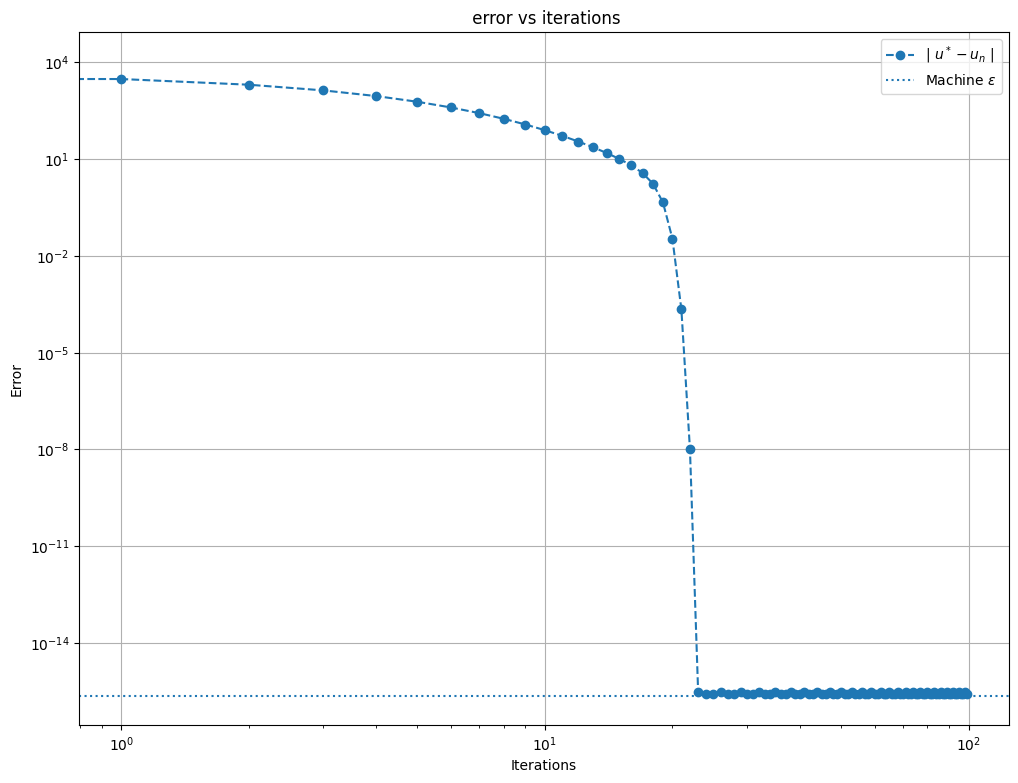

In [8]:
# Initialize u

N = 100
u = np.zeros(N)

# Run method and print result
u, err, tol = newtons_method(f, df, u)
print(f"Zero found at u = {u}")

# Validate result: found vector u must fullfill f(u) = 0
print(f"f({list(u)}) = {f(u)}")

# Plot error vs iteration number
fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.plot(err, '--o', label='$\\vert\  u^*-u_n\ \\vert$')
# plt.semilogy(err, '--o', label='$\\vert\  u^*-u_n\ \\vert$')
ax.axhline(y=machine_eps, linestyle=":", label="Machine $\epsilon$")
ax.set(xscale ='log', yscale='log',
    xlabel = 'Iterations', ylabel = 'Error', title= ' error vs iterations')

ax.grid()
ax.legend()
